In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
#from sklearn.linear_model import LogisticRegression
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import TruncatedSVD, pca

%matplotlib inline

C:\Users\cmok1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
spend_df = pd.read_csv('spenddata.csv')
spend_df.head()

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,...,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
0,1,1,2.0,NaN,1,5,1,57,34,1,...,1,0,0,0,1,0,0,0,5.0,NaN
1,2,1,2.0,NaN,1,4,1,57,34,2,...,0,0,0,0,0,0,1,0,NaN,NaN
2,3,1,2.0,NaN,1,5,1,57,42,2,...,0,0,0,0,0,0,0,0,3.0,NaN
3,4,1,2.0,NaN,1,6,1,57,34,2,...,0,0,0,0,1,0,1,0,5.0,NaN
4,5,1,2.0,NaN,1,8,1,22,1,1,...,0,0,0,0,0,0,0,0,5.0,NaN


In [3]:
spend_df.describe()

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,...,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
count,18379.000000,18379.000000,14370.000000,1899.00000,18379.0,18379.000000,18379.0,18379.000000,18379.000000,18379.000000,...,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,13961.000000,0.0
mean,11501.723326,6.504054,1.967780,2.38020,1.0,6.339681,1.0,56.685130,25.217966,1.560422,...,0.330595,0.098373,0.047718,0.070842,0.142336,0.038359,0.070352,0.017683,3.038536,NaN
std,6645.173397,3.468736,0.845175,0.81202,0.0,2.450582,0.0,36.091902,10.631883,0.496349,...,0.470440,0.297827,0.213174,0.256567,0.349404,0.192067,0.255746,0.131801,1.247728,NaN
min,1.000000,1.000000,1.000000,1.00000,1.0,1.000000,1.0,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,5729.500000,4.000000,1.000000,2.00000,1.0,4.000000,1.0,25.000000,20.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,NaN
50%,11514.000000,7.000000,2.000000,2.00000,1.0,6.000000,1.0,57.000000,24.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,NaN
75%,17293.500000,9.000000,3.000000,3.00000,1.0,8.000000,1.0,65.000000,30.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,NaN
max,22974.000000,12.000000,3.000000,4.00000,1.0,12.000000,1.0,137.000000,50.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,NaN


In [4]:
spend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Columns: 301 entries, Unnamed: 0 to t.158
dtypes: float64(134), int64(165), object(2)
memory usage: 42.2+ MB


(array([245.,   2.,   8.,   0.,   2.,   0.,   2.,   2.,  11.,  29.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

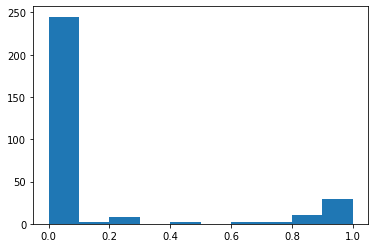

In [5]:
missing_proportion = spend_df.isna().sum(axis=0) / len(spend_df)
plt.hist(missing_proportion)

In [6]:
#Drop columns with more than 50% missing value
num_columns = (missing_proportion > 0.5).sum()
print(f"There are {num_columns} columns with more than 50% missing value")
missing_columns = missing_proportion.loc[missing_proportion > 0.5].index
missing_columns

There are 44 columns with more than 50% missing value


Index(['var6', 'b.10', 'b.11', 'b.13', 'b.14', 'b.20', 'b.21', 'c.31', 'c.36',
       'c.37', 'c.61', 'c.67', 'f.105', 'f.106', 'f.107', 'f.108', 'f.109',
       'f.110', 'f.111', 'f.112', 'f.113', 'f.114', 'f.115', 'f.116', 'f.117',
       'f.118', 'f.119', 'f.120', 'f.121', 'f.122', 'f.123', 'a.184', 'a.185',
       'b.195', 'c.215', 'c.216', 'c.217', 'c.218', 'c.219', 'c.220', 'c.221',
       'c.222', 'c.223', 't.158'],
      dtype='object')

In [7]:
#Drop columns with more than 50% missing value
num_columns = (missing_proportion > 0.5).sum()
print(f"There are {num_columns} columns with more than 50% missing value")
missing_columns = missing_proportion.loc[missing_proportion > 0.5].index
missing_columns
spend_df.drop(missing_columns, axis=1, inplace=True)
spend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Columns: 257 entries, Unnamed: 0 to f.284
dtypes: float64(90), int64(165), object(2)
memory usage: 36.0+ MB


In [8]:
spend_df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:


#Identify which variables are numerical or categorical
for i in spend_df.columns:
    print(f"Column {i} unique values:\n{spend_df[i].unique()}")

#Columns with less than 5 unique values are considered categorical
categorical = [x for x in spend_df.columns if len(spend_df[x].unique()) < 5]
numerical = [x for x in spend_df.columns if len(spend_df[x].unique()) >= 5]

Column month unique values:
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Column var8 unique values:
[ 2.  1. nan  3.]
Column a.1 unique values:
[1]
Column a.2 unique values:
[ 5  4  6  8  7 11  2 10  3 12  9  1]
Column a.3 unique values:
[1]
Column a.4 unique values:
[ 57  22  25   3  47  83  16  65   7  58  44  35   8  54  32 120 117  91
  96  79 137 121  10 115 133 106  45  70  61 124 136  17  53  95 108  71
 129  63  38  68  46  60 112  24  41  82  81  26 130 123  92 116  37  89
 125  62 114  59 111  28  15 134  94  98   6  43 101  55  93 102 105  33
  20  80 103  21  12  51 109 128  67 132   9  88  69 113  36  39   5  48
 131   2  56  49  75  42  31  74  76  29  64  85 107  78  72 122  66  30
  11 100 127]
Column var5 unique values:
[34 42  1 29  2  8  3 17 27 48 20 10 18 30 12  5 21 15 36 49 35 23 16 33
 28 25 13  6 22 47 19 43 41 40  9  7 45 24 31 14 44 39 46 38 11 50 32  4
 26 37]
Column b.5 unique values:
[1 2]
Column b.6 unique values:
[nan  3.  1.  4.  2.]
Column b.7 unique values:


  115.    325.     48.33   33.75]
Column c.147 unique values:
[0.0000e+00 2.0000e+01 7.5000e+01 2.6000e+01 3.0000e+01 1.4000e+01
 1.9500e+03 1.7500e+02 3.3330e+01 3.3000e+01 5.0000e+01 3.2500e+02
 2.0000e+02 1.8500e+01 6.0000e+02 6.0000e+01 1.6670e+01 3.0000e+02
 1.3000e+03 2.5000e+01 1.0000e+02 3.4000e+01 6.5000e+01 1.8000e+02
 2.3000e+01 7.0000e+01 2.5000e+02 2.2000e+01 8.0000e+00 2.8330e+01
 7.5000e+02 5.0000e+02 1.2000e+02 7.2000e+02 2.2000e+02 8.0000e+01
 1.5000e+02 1.2000e+01 2.4000e+01 4.0000e+01 5.0000e+00 4.2000e-01
 3.5000e+01 6.6670e+01 1.1667e+02        nan 1.6250e+02 8.0000e+02
 2.1429e+02 1.0000e+01 1.6000e+01 1.0000e+03 4.0000e+02 1.2500e+02
 1.2500e+01 3.7500e+01 1.8750e+02 3.8000e+01]
Column c.148 unique values:
[  0.    50.    90.     2.09 216.67 100.   300.   600.      nan  30.  ]
Column t7.149 unique values:
[0.00000e+00 4.00000e+03 7.50000e+01 2.00000e+03 1.60000e+02 2.00000e+02
 1.33330e+02 1.20000e+01 5.00000e+01 1.00000e+02 5.00000e+00 3.00000e+01
 8.00000e+01 6

[0 1]
Column c.255 unique values:
[0 1]
Column c.256 unique values:
[0 1]
Column c.257 unique values:
[0 1]
Column c.258 unique values:
[0 1]
Column c.259 unique values:
[0 1]
Column c.260 unique values:
[0 1]
Column c.261 unique values:
[0 1]
Column c.262 unique values:
[0 1]
Column c.263 unique values:
[0 1]
Column c.264 unique values:
[0]
Column c.265 unique values:
[0 1]
Column c.266 unique values:
[0 1]
Column c.267 unique values:
[1 0]
Column c.268 unique values:
[0 1]
Column c.269 unique values:
[0 1]
Column c.270 unique values:
[1 0]
Column c.271 unique values:
[1 0]
Column c.272 unique values:
[0 1]
Column c.273 unique values:
[0 1]
Column c.274 unique values:
[0 1]
Column c.275 unique values:
[0 1]
Column c.276 unique values:
[1 0]
Column c.277 unique values:
[0 1]
Column c.278 unique values:
[0 1]
Column c.279 unique values:
[0 1]
Column c.280 unique values:
[1 0]
Column c.281 unique values:
[0 1]
Column c.282 unique values:
[0 1]
Column c.283 unique values:
[0 1]
Column f.2

In [10]:
#impute strategy -> Replace continuous variables with median, discrete variables with mode
for i in categorical:
    print(i)
    spend_df[i] = spend_df[i].fillna(value = spend_df[i].mode().item())

var8
a.1
a.3
b.5
b.7
b.9
b.12
b.28
c.29
c.30
var7
c.32
c.33
c.34
c.35
c.38
c.45
c.49
c.51
c.53
c.55
b.63
c.64
c.93
e.95
e.96
e.97
e.98
e.99
e.100
e.101
f.102
c.126
c.159
c.160
c.161
c.162
c.163
c.164
c.165
c.166
c.167
c.168
c.169
c.170
c.171
c.172
t7.173
t7.174
t7.175
t7.176
t7.177
t7.178
t7.179
t7.180
t7.181
t7.182
var1
c.187
f.188
var9
year
b.191
b.192
b.193
c.196
c.197
c.198
c.199
c.200
c.201
c.202
c.203
c.204
c.205
c.206
c.207
c.208
c.209
c.210
c.211
c.212
c.213
c.224
c.225
c.226
c.227
c.228
c.229
c.230
c.231
c.232
c.233
c.234
c.235
c.236
c.237
c.238
c.239
c.240
c.241
c.242
c.243
c.244
c.245
c.246
c.247
c.248
c.249
c.251
c.252
c.253
c.254
c.255
c.256
c.257
c.258
c.259
c.260
c.261
c.262
c.263
c.264
c.265
c.266
c.267
c.268
c.269
c.270
c.271
c.272
c.273
c.274
c.275
c.276
c.277
c.278
c.279
c.280
c.281
c.282
c.283


In [20]:
for i in categorical:
    print(i)
    spend_df[i] = spend_df[i].fillna(value = spend_df[i].mode().item())
for j in numerical:
    spend_df[j].fillna(value=spend_df[j].median(), inplace=True)

In [21]:
spend_df[spend_df.isna().any(axis=1)]

,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284


In [22]:
clustering = DBSCAN(eps=3, min_samples=2)
scaler = StandardScaler()
one_hot = OneHotEncoder(handle_unknown = 'ignore')

In [36]:
X = spend_df.drop(categorical, axis=1).values
X = scaler.fit_transform(X)

In [39]:
db = clustering.fit(X)

In [46]:
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [48]:
n_clusters_

672

In [49]:
kmeans_clustering = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=200)
kmeans_clustering.fit(X)

MiniBatchKMeans(batch_size=200, n_clusters=2, random_state=0)

In [51]:
kmeans_clustering.inertia_

2000632.6246231522

In [58]:
inertias = []
K = range(1,100)
for k in K:
    print(k)
    kmeans_clustering =  MiniBatchKMeans(n_clusters=k, random_state=0, batch_size=200)
    kmeans_clustering.fit(X)
    inertias.append(kmeans_clustering.inertia_)
    print(kmeans_clustering.inertia_)

1
2095805.584084594
2
2000632.6246231522
3
1988358.7751485324
4
1965698.601582116
5
1987109.0061874145
6
1871465.5513877878
7
1846438.4828121893
8
1860659.0061797881
9
1878951.9045059548
10
1876781.748153781
11
1822245.7940704408
12
1810594.0969114425
13
1778325.8730409637
14
1763802.3497999513
15
1750124.960611453
16
1746028.0854064827
17
1744626.2370299671
18
1774791.9716275728
19
1756000.4345282123
20
1770827.4319575976
21
1738661.7832082298
22
1706770.9966619036
23
1717016.4800651248
24
1686430.6699351068
25
1672612.9621265547
26
1680920.367789038
27
1664135.8534538825
28
1657321.0623642611
29
1609908.7578271904
30
1664101.2698248045
31
1635103.8452139257
32
1606308.4748542113
33
1585258.9374559107
34
1509689.4287395617
35
1474719.2416633111
36
1489106.6831514041
37
1490735.6987080108
38
1471998.37583604
39
1457052.1146964824
40
1440705.6369243206
41
1439898.2897622145
42
1433984.9290930226
43
1427413.463313251
44
1382860.2092393048
45
1359519.8334946476
46
1437180.5051034975
47
13

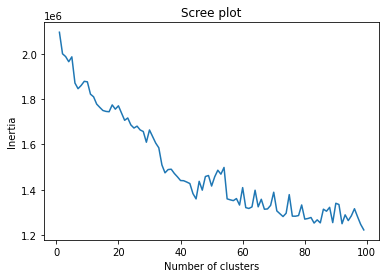

In [59]:
fig = plt.figure()
plt.plot(K, np.array(inertias))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Scree plot')
plt.show()

In [66]:
kmeans_clustering =  KMeans(n_clusters=40, random_state=0).fit(X)


array([12, 10,  5, ..., 23, 23,  9])

In [67]:
labels = kmeans_clustering.labels_

In [68]:
spend_df['label'] = labels
spend_df.head()

,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,label
0,1,2.0,1,5,1,57,34,1,2.0,1,...,1,0,0,0,1,0,0,0,5.0,12
1,1,2.0,1,4,1,57,34,2,3.0,1,...,0,0,0,0,0,0,1,0,3.0,10
2,1,2.0,1,5,1,57,42,2,1.0,1,...,0,0,0,0,0,0,0,0,3.0,5
3,1,2.0,1,6,1,57,34,2,4.0,1,...,0,0,0,0,1,0,1,0,5.0,1
4,1,2.0,1,8,1,22,1,1,2.0,1,...,0,0,0,0,0,0,0,0,5.0,5


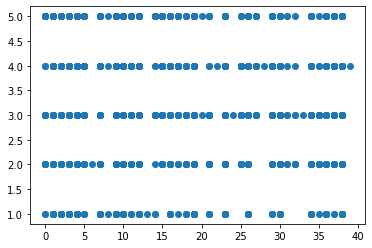

In [77]:
#Visualize clusters
plt.scatter(spend_df['label'], spend_df['f.284'])

In [23]:
numeric_transformer = make_pipeline(scaler)
categorical_transformer = make_pipeline(one_hot)

In [24]:
col_transformer = make_column_transformer(
    (numeric_transformer, numerical),
    (categorical_transformer, categorical),
    remainder='passthrough',
)

In [25]:
x = col_transformer.fit_transform(spend_df)

In [26]:
x[0]

array([-1.58680384, -0.54669362,  0.00872436,  0.82603173, -0.14029124,
       -0.59091812,  0.77995379,  0.71424583,  0.77716862,  0.71106306,
        1.41187271, -0.37359598, -0.41165389, -0.36824287, -0.26318547,
       -0.08281451, -0.02941666, -0.01217347,  0.07251924, -0.09114272,
       -0.01868498, -0.05304826, -0.08354091, -0.0306711 , -0.01983806,
        0.29264064, -0.09725268, -0.10846222,  1.31156262, -0.06569769,
       -0.05336164,  0.34125234, -0.30666411, -0.30666411, -0.07430144,
       -0.01146774, -0.08603641, -0.08678648, -0.0208499 , -0.08398396,
       -0.04069562, -0.03116089, -0.01233944, -0.05411057, -0.0839643 ,
       -0.06468703, -0.07321398, -0.43630571, -0.2983996 , -0.13452923,
       -0.07116377, -0.20378652, -0.40501305, -0.50896618,  1.14226387,
       -0.15327665, -0.09443868, -0.06647586, -0.18793214, -0.25038604,
       -0.05261767, -0.01475653,  0.10662344, -0.10291973,  0.5677309 ,
       -0.80267192,  2.68004982, -0.64244682,  0.10662344, -0.48

In [27]:
pipe = make_pipeline(col_transformer,clustering)

In [33]:
pipe.fit(spend_df)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['month', 'a.2', 'a.4',
                                                   'var5', 'b.6', 'b.8', 'b.15',
                                                   'b.16', 'b.17', 'b.18',
                                                   'b.19', 'b.22', 'pov6',
                                                   'b.23', 'b.24', 'b.25',
                                                   'b.26', 'b.27', 'c.39',
                                                   'c.40', 'c.41', 'c.42',
                                                   'c.43', 'c.44', 'c.46',
                                                   'c.47', '

In [34]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    ['month', 'a.2', 'a.4', 'var5', 'b.6', 'b.8',
                                     'b.15', 'b.16', 'b.17', 'b.18', 'b.19',
                                     'b.22', 'pov6', 'b.23', 'b.24', 'b.25',
                                     'b.26', 'b.27', 'c.39', 'c.40', 'c.41',
                                     'c.42', 'c.43', 'c.44', 'c.46', 'c.47',
                                     'c.48', 'c.50', 'c.52', 'c.54', ...]),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                           

In [35]:
pipe.labels_

AttributeError: 'Pipeline' object has no attribute 'labels_'

# Impute

In [24]:
spend_df = pd.read_csv('spenddata.csv')

In [25]:
spend_df['totshopping.rep'].isna().sum()

0

In [26]:
spend_df.columns

Index(['Unnamed: 0', 'month', 'var8', 'var6', 'a.1', 'a.2', 'a.3', 'a.4',
       'var5', 'b.5',
       ...
       'c.276', 'c.277', 'c.278', 'c.279', 'c.280', 'c.281', 'c.282', 'c.283',
       'f.284', 't.158'],
      dtype='object', length=301)

(array([245.,   2.,   8.,   0.,   2.,   0.,   2.,   2.,  11.,  29.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

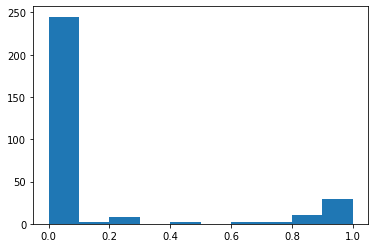

In [27]:
missing_proportion = spend_df.isna().sum(axis=0) / len(spend_df)
plt.hist(missing_proportion)

In [28]:
#Drop columns with more than 50% missing value

num_columns = (missing_proportion > 0.5).sum()
print(f"There are {num_columns} columns with more than 50% missing value")
missing_columns = missing_proportion.loc[missing_proportion > 0.5].index

spend_df.drop(missing_columns, axis=1, inplace=True)
spend_df.drop('Unnamed: 0', axis=1, inplace=True)
spend_df.head()

There are 44 columns with more than 50% missing value


,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284
0,1,2.0,1,5,1,57,34,1,NaN,1,...,0,1,0,0,0,1,0,0,0,5.0
1,1,2.0,1,4,1,57,34,2,3.0,1,...,0,0,0,0,0,0,0,1,0,NaN
2,1,2.0,1,5,1,57,42,2,1.0,1,...,0,0,0,0,0,0,0,0,0,3.0
3,1,2.0,1,6,1,57,34,2,4.0,1,...,0,0,0,0,0,1,0,1,0,5.0
4,1,2.0,1,8,1,22,1,1,NaN,1,...,0,0,0,0,0,0,0,0,0,5.0


In [29]:
categorical = [x for x in spend_df.columns if len(spend_df[x].unique()) < 5]
numerical = [x for x in spend_df.columns if len(spend_df[x].unique()) >= 5]

In [30]:
for i in categorical:
    spend_df[i] = spend_df[i].fillna(value = spend_df[i].mode().item())
for j in numerical:
    spend_df[j].fillna(value=spend_df[j].median(), inplace=True)

In [31]:
X = spend_df.drop(['totshopping.rep'], axis=1) #Drop cabin for simplicity
y = spend_df['totshopping.rep'].values
print(X.shape, y.shape)

(18379, 255) (18379,)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)

(14703, 255) (14703,)


In [47]:
numeric_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
one_hot = OneHotEncoder(handle_unknown = 'ignore')

In [48]:
numerical.remove('totshopping.rep')

ValueError: list.remove(x): x not in list

In [49]:
numeric_transformer = make_pipeline((numeric_imputer),
                                   (scaler))
categorical_transformer = make_pipeline( (cat_imputer),(one_hot))

In [50]:
col_transformer = make_column_transformer(
    (numeric_transformer, numerical),
    (categorical_transformer, categorical), 
    remainder='passthrough',
)

In [53]:
x_tr = col_transformer.fit_transform(X_train)
x_tr.shape

(14703, 413)

In [54]:
x_val = col_transformer.transform(X_test)
x_val.shape

(3676, 413)

In [38]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x, y_train)

Ridge()

In [55]:
x_val = col_transformer.transform(X_test)

In [45]:
x_val.shape

(3676, 405)

In [56]:
ridge.score(x_val, y_test)

0.9999986300747374

In [57]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge()
ridge_pipe = make_pipeline(col_transformer, ridge)

In [26]:
ridge_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    ['month', 'a.2', 'a.4', 'var5', 'b.6', 'b.8',
                                     'b.15', 'b.16', 'b.17', 'b.18', 'b.19',
                                     'b.22', 'pov6', 'b.23', 'b.24', 'b.25',
                                     'b.26', 'b.27', 'c.39', 'c.40', 'c.41',
                                     'c.42', 'c.43', 'c.44', 'c.46', 'c...
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                           

In [61]:
params = {'ridge__alpha' : np.array([0.1, 1.0, 5.0, 10.0]), 'ridge__random_state' : [42]}
grid_search_ridge = GridSearchCV(ridge_pipe, param_grid=params, cv=3, scoring= 'neg_mean_absolute_error', refit=True, verbose=2)

In [70]:
grid_search_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] ridge__alpha=0.1, ridge__random_state=42 ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... ridge__alpha=0.1, ridge__random_state=42, total=   2.2s
[CV] ridge__alpha=0.1, ridge__random_state=42 ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ......... ridge__alpha=0.1, ridge__random_state=42, total=   2.2s
[CV] ridge__alpha=0.1, ridge__random_state=42 ........................
[CV] ......... ridge__alpha=0.1, ridge__random_state=42, total=   2.2s
[CV] ridge__alpha=1.0, ridge__random_state=42 ........................
[CV] ......... ridge__alpha=1.0, ridge__random_state=42, total=   2.6s
[CV] ridge__alpha=1.0, ridge__random_state=42 ........................
[CV] ......... ridge__alpha=1.0, ridge__random_state=42, total=   2.4s
[CV] ridge__alpha=1.0, ridge__random_state=42 ........................
[CV] ......... ridge__alpha=1.0, ridge__random_state=42, total=   2.4s
[CV] ridge__alpha=5.0, ridge__random_state=42 ........................
[CV] ......... ridge__alpha=5.0, ridge__random_state=42, total=   2.2s
[CV] ridge__alpha=5.0, ridge__random_state=42 ........................
[CV] ......... ridge__alpha=5.0, ridge__random_state=42, total=   2.1s
[CV] ridge__alpha=5.0, ridge__random_state=42 ........................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   26.6s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['month',
                                                                          'a.2',
                                                                          'a.4',
                                                      

In [73]:
grid_search_ridge.cv_results_

{'mean_fit_time': array([1.82811077, 2.05251177, 1.78622262, 1.72505323]),
 'std_fit_time': array([0.02026171, 0.02077702, 0.07880014, 0.03760423]),
 'mean_score_time': array([0.35339729, 0.43417382, 0.32978582, 0.34939869]),
 'std_score_time': array([0.01478089, 0.07269717, 0.00995192, 0.01024769]),
 'param_ridge__alpha': masked_array(data=[0.1, 1.0, 5.0, 10.0],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_ridge__random_state': masked_array(data=[42, 42, 42, 42],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'ridge__alpha': 0.1, 'ridge__random_state': 42},
  {'ridge__alpha': 1.0, 'ridge__random_state': 42},
  {'ridge__alpha': 5.0, 'ridge__random_state': 42},
  {'ridge__alpha': 10.0, 'ridge__random_state': 42}],
 'split0_test_score': array([-0.00602103, -0.05953651, -0.29030112, -0.55700091]),
 'split1_test_score': array([-0.01124453, -0.10462834, -0.45841

In [71]:
grid_search_ridge.predict(X_test.head())

array([330.98985489, 279.10038904, 276.69975749, 648.676264  ,
       175.7024046 ])

In [72]:
y_test[:5]

array([330.99, 279.1 , 276.7 , 648.68, 175.7 ])

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [37]:
rf_pipe = make_pipeline(col_transformer,rf)


In [38]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    ['month', 'a.2', 'a.4', 'var5', 'b.6', 'b.8',
                                     'b.15', 'b.16', 'b.17', 'b.18', 'b.19',
                                     'b.22', 'pov6', 'b.23', 'b.24', 'b.25',
                                     'b.26', 'b.27', 'c.39', 'c.40', 'c.41',
                                     'c.42', 'c.43', 'c.44', 'c.46', 'c...
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                           

In [45]:
rf_pipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['month', 'a.2', 'a.4',
                                                   'var5', 'b.6', 'b.8', 'b.15',
                                                   'b.16', 'b.17', 'b.18',
                                                   'b.19', 'b.22', 'pov6',
                                                   'b.23', 'b.24', 'b.25',
                                                   'b.26', 'b.27', 'c.39',
                        

In [46]:
rf_pipe.best_params_

AttributeError: 'Pipeline' object has no attribute 'best_params_'

In [ ]:
rf.

In [48]:
params = {#'randomforestregressor__max_depth' : [10, 30, 50],
          #'randomforestregressor__max_features': ['auto', 'sqrt'],
         'randomforestregressor__n_estimators' : [100],}
         #'randomforestregressor__min_samples_split': [5,10]}

In [49]:
grid_search_rf = GridSearchCV(pipe, param_grid=params, cv=3, scoring= 'neg_root_mean_squared_error', refit=True, verbose=2)

In [50]:
grid_search_rf.fit(X, y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] randomforestregressor__n_estimators=100 .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... randomforestregressor__n_estimators=100, total=  53.3s
[CV] randomforestregressor__n_estimators=100 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   53.2s remaining:    0.0s


[CV] .......... randomforestregressor__n_estimators=100, total=  53.8s
[CV] randomforestregressor__n_estimators=100 .........................
[CV] .......... randomforestregressor__n_estimators=100, total=  53.7s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['month',
                                                                          'a.2',
                                                                          'a.4',
                                                      

In [53]:
grid_search_rf

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['month',
                                                                          'a.2',
                                                                          'a.4',
                                                      

In [54]:
grid_search_rf.best_score_

-13.402960339693996